In [1]:
import optuna
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from eval_help import *
from combine_results import combine_results
import pandas as pd

In [2]:
[s.study_name for s in optuna.study.get_all_study_summaries(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db")]

['optimize_counterfactuals_full',
 'optimize_counterfactuals_full_lower_range',
 'optimize_counterfactuals_2',
 'optimize_counterfactuals_vgg_distance',
 'optimize_counterfactuals_vgg_distance_real',
 'optimize_counterfactuals_vgg_distance_final',
 'optimize_counterfactuals_resnet',
 'optimize_counterfactuals_initial',
 'optimize_counterfactuals_initial2',
 'optimize_counterfactuals_vandenhende',
 'optimize_counterfactuals_vandenhende2',
 'optimize_counterfactuals_vandenhende3',
 'optimize_counterfactuals_performance_vgg',
 'optimize_counterfactuals_performance_vgg_2',
 'optimize_counterfactuals_initial3',
 'optimize_counterfactuals_performance_vgg_final']

In [3]:
study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_vandenhende3")

In [4]:
study.sampler

In [5]:
# search_space = {"lambd": [0.0, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0], "temperature": [0.07, 0.1, 0.2]}
# study = optuna.create_study(
#     storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db",
#     study_name="optimize_counterfactuals_vandenhende3",
#     directions=["maximize", "minimize"],
#     sampler=optuna.samplers.GridSampler(search_space),
#     load_if_exists=True,
# )
# study.sampler

In [6]:
len(study.trials)

25

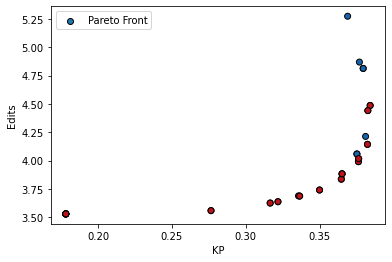

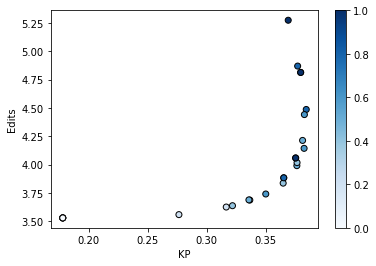

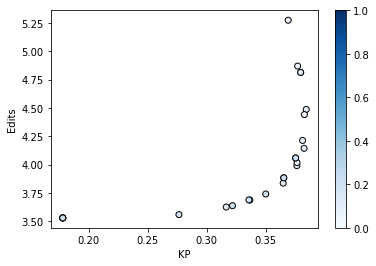

In [7]:
plot_study(study, "vandenhende", print_colorbar=False)
plot_study(study, "vandenhende_lambd", print_pareto=False, map=lambda t: t.params["lambd"])
plot_study(study, "vandenhende_temp", print_pareto=False, map=lambda t: t.params["temperature"])

In [11]:
optuna.visualization.plot_pareto_front(study, target_names=["KP", "edits"])

In [12]:
hyperparams = ["lambd", "temperature"]

In [13]:
analyze_spearman(study, hyperparams)

lambd correlation is: 0.715147095445268 on KP, 0.8566176107840321 on edits.
lambd pvalue is: 5.8779172763465434e-05 on KP, 4.650232893589127e-08 on edits.
temperature correlation is: -0.3957571328679983 on KP, -0.40437392891800134 on edits.
temperature pvalue is: 0.0501975261301589 on KP, 0.04497156023607974 on edits.


In [14]:
analyze_pearson(study, hyperparams)

lambd correlation is: 0.8064808268380707 on KP, 0.7708287894510665 on edits.
lambd pvalue is: 1.1265642658839015e-06 on KP, 6.517341782382665e-06 on edits.
temperature correlation is: -0.2126455943927828 on KP, -0.47949540293527787 on edits.
temperature pvalue is: 0.3074787332525667 on KP, 0.015291781762591135 on edits.


In [15]:
results = combine_results("optimize_counterfactuals_vandenhende")

In [16]:
results

[{'id': 'optimize_counterfactuals_vandenhende_3',
  'mode': 'additive',
  'lambd': '0.5',
  'lambd2': '0',
  'max_dist': '0',
  'parts_type': 'full',
  'avg_edits': '3.9911584674676943',
  'eval_single_near': '0.7853094536386307',
  'eval_single_same': '0.4334618000453412',
  'eval_all_near': '0.710479977279182',
  'eval_all_same': '0.37625674524282876',
  'time': None},
 {'id': 'optimize_counterfactuals_vandenhende_6',
  'mode': 'additive',
  'lambd': '0.8',
  'lambd2': '0',
  'max_dist': '0',
  'parts_type': 'full',
  'avg_edits': '3.88415325323056',
  'eval_single_near': '0.7849693946950805',
  'eval_single_same': '0.41895261845386533',
  'eval_all_near': '0.7152279227222319',
  'eval_all_same': '0.3651432907255005',
  'time': None},
 {'id': 'optimize_counterfactuals_vandenhende_24',
  'mode': 'additive',
  'lambd': '0.8',
  'lambd2': '0',
  'max_dist': '0',
  'parts_type': 'full',
  'avg_edits': '3.883926547268193',
  'eval_single_near': '0.7849693946950805',
  'eval_single_same': 

In [19]:
for r in results:
    if r["lambd"] == "0.4":
        print(r["avg_edits"])
        print(r["eval_single_near"])
        print(r["eval_single_same"])
        print(r["eval_all_near"])
        print(r["eval_all_same"])

3.638177284062571
0.7714803899342553
0.3430061210609839
0.7251059322033898
0.32178464606181456
3.8369984130582635
0.7808886873724779
0.4098843799591929
0.7187887740029542
0.36466765140324964
4.017909771026978
0.7786216277488098
0.42983450464747225
0.7061445579190881
0.3764035434181572
